In [112]:
import utils as ut
import numpy as np
import pandas as pd
import networkx as nx
import sklearn
from sklearn import cluster
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import community
import importlib
importlib.reload(ut)

<module 'utils' from '/Users/mariomoreno/Desktop/Grad_School/ML_and_PubPol/SOTU_Project/State-of-the-Unions/utils.py'>

In [113]:
co_matrix = pd.read_csv('co_occurence.csv', index_col = 0)

In [114]:
co_matrix.shape

(1000, 1000)

In [91]:
co_matrix = co_matrix.iloc[:50]
co_matrix = co_matrix.iloc[:,:50]

In [115]:
co_matrix = ut.pairwise_similarity(co_matrix, 'cosine')

['mr speaker', 'both the congress', 'the price', 'the people', 'million', 'the state', 'the union', 'a series', 'construction', 'a reduction', 'the rate', 'increase', 'tax', 'the increase', 'the beginning', 'the expense', 'the cost', 'waste', 'fraud', 'this year', 'the budget', 'office', 'a change', 'law', 'revenue', 'the number', 'employee', 'the department', 'the last year', 'the system', 'the time', 'a bill', 'the next year', 'operation', 'aid', 'the federal government', 'the national government', 'the return', 'transportation', 'the extent', 'hand', 'legislation', 'dollar', 'service', 'the land', 'the enactment', 'the house', 'detail', 'the past year', 'the year', 'the difference', 'a period', 'the condition', 'the present', 'the evil', 'my message', 'the experience', 'my opinion', 'combination', 'corporation', 'experience', 'money', 'the public', 'the place', 'the farmer', 'connection', 'the power', 'the constitution', 'this power', 'practice', 'the several state', 'regulation', '

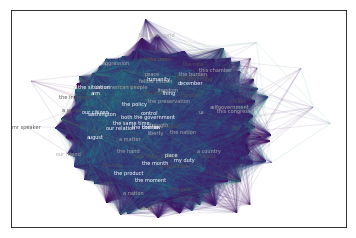

In [116]:
# establish graph
graph = nx.Graph(co_matrix)

edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

#first compute the best partition
partition = community.best_partition(graph)

# first calculate k-means unsupervised
#kmeans = cluster.KMeans(n_clusters = 8).fit(co_matrix)
#co_matrix['scores'] = kmeans.labels_
#partition = co_matrix['scores'].to_dict()

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0.
for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    print(list_nodes)
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 0,
                                node_color = str(count / size))
    l = {node: node for node in list_nodes[:20]}
    nx.draw_networkx_labels(graph, pos, font_size = 5, font_color=str(count/size), labels = l)
    

edges = []
weightsl = []
for u, v, weight in graph.edges.data('weight'):
    if weight > 0.39:
        edges.append((u, v))
        weightsl.append(weight)

nx.draw_networkx_edges(graph, pos, edgelist = [edge for edge in edges], alpha=0.1, edge_color = weightsl)
#plt.figure(figsize=(100,100))
plt.savefig("testinggraph.png", dpi=500)

In [100]:
graph.nodes(data=True)

NodeDataView({'mr speaker': {}, 'both the congress': {}, 'fellow citizen': {}, 'the nation': {}, 'selfgovernment': {}, 'the preservation': {}, 'liberty': {}, 'the hand': {}, 'the american people': {}, 'our friend': {}, 'a matter': {}, 'the free world': {}, 'aggression': {}, 'a nation': {}, 'arm': {}, 'a country': {}, 'us': {}, 'peace': {}, 'the price': {}, 'strength': {}, 'the burden': {}, 'freedom': {}, 'this chamber': {}, 'washington': {}, 'this congress': {}, 'this administration': {}, 'america': {}, 'prosperity': {}, 'our nation': {}, 'the world': {}, 'the blessing': {}, 'our child': {}, 'humanity': {}, 'my duty': {}, 'the progress': {}, 'our relation': {}, 'other nation': {}, 'the foundation': {}, 'the face': {}, 'the people': {}, 'million': {}, 'their child': {}, 'the state': {}, 'the union': {}, 'the situation': {}, 'this time': {}, 'a series': {}, 'unemployment': {}, 'inflation': {}, 'percent': {}, 'construction': {}, 'thing': {}, 'place': {}, 'the past': {}, 'a reduction': {},